In [ ]:
pip install --upgrade scikit-learn

In [ ]:
#columnas_seleccionadas = [
   # 'action_taken2', 'purchaser_type', 'preapproval',
    #'loan_type', 'loan_purpose', 'lien_status','reverse_mortgage','open_end_line_of_credit', 'business_or_commercial_purpose' 'loan_amount', 'hoepa_status',
    #'occupancy_type', 'applicant_credit_score_type','combined_loan_to_value_ratio', 'property_value ','occupancy_type ','manufactured_home_secured_proper',
    #'applicant_age', 'hoepa_status ', 'loan_term ','manufactured_home_land_property', 'multifamily_affordable_units','income ','applicant_credit_score_type'
    #'conforming_loan_limit', 'derived_loan_product_type', 'applicant_sex '

# CARGA INFORMACION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Librerias
import os
from pandas import read_csv
%matplotlib inline

import numpy as np
import pandas as pd
#graficas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

# Reemplaza la ruta con la ubicación de tu archivo Stata (.dta)
file_path = "/content/drive/MyDrive/Proyecto Grado/HDMA/Version Final/LAR_18_19_Muestra.dta"

# Cargar el archivo Stata en un DataFrame
data = pd.read_stata(file_path)


In [ ]:
# Información sobre tipos de datos y valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   activity_year                     1000000 non-null  int16   
 1   lei                               1000000 non-null  object  
 2   state_code                        1000000 non-null  object  
 3   county_code                       1000000 non-null  object  
 4   action_taken                      1000000 non-null  category
 5   purchaser_type                    1000000 non-null  category
 6   preapproval                       1000000 non-null  int8    
 7   loan_type                         1000000 non-null  category
 8   loan_purpose                      1000000 non-null  category
 9   lien_status                       1000000 non-null  int8    
 10  reverse_mortgage                  973978 non-null   float64 
 11  open_end_line_of_credit  

In [ ]:
categorias_columna1 = data['applicant_sex'].unique()
categorias_columna2 = data['applicant_race_1'].unique()
categorias_columna3 = data['applicant_ethnicity_1'].unique()
categorias_columna4 = data['applicant_age_above_62'].unique()

print("Categorías únicas en applicant_sex :", categorias_columna1)
print("Categorías únicas en applicant_race_1:", categorias_columna2)
print("Categorías únicas en applicant_ethnicity_1:", categorias_columna3)
print("Categorías únicas en applicant_age_above_62:", categorias_columna4)


Categorías únicas en applicant_sex : ['mujer', 'hombre', 'selecciono ambas opciones']
Categories (3, object): ['hombre' < 'mujer' < 'selecciono ambas opciones']
Categorías únicas en applicant_race_1: ['negro/afroamericano', 'blanco', 'sin info', 'asiatico', 'nativo americano/alaska', ..., 'koreano', 'guameno o chamorro', 'japones', 'samoan', 'hawaiano']
Length: 18
Categories (18, object): ['nativo americano/alaska' < 'asiatico' < 'negro/afroamericano' <
                          'hawaiano/isleno del pacifico' ... 'hawaiano' < 'guameno o chamorro' < 'samoan' <
                          'otro isleno del pacifico']
Categorías únicas en applicant_ethnicity_1: ['no hispano/latino', 'hispano/latino', 'sin info', 'mexicano', 'otro hispano/latino', 'cubano', 'puertorriqueno', NaN, 'no aplica']
Categories (8, object): ['hispano/latino' < 'no hispano/latino' < 'sin info' < 'no aplica' < 'mexicano' <
                         'puertorriqueno' < 'cubano' < 'otro hispano/latino']
Categorías únicas e

In [ ]:
# Mostrar los datos originales de una columna específica
columna_original = data['action_taken2']
print(columna_original)


0                negado
1              aprobado
2              aprobado
3              aprobado
4         no finalizado
              ...      
999995         aprobado
999996         aprobado
999997         aprobado
999998         aprobado
999999         aprobado
Name: action_taken2, Length: 1000000, dtype: category
Categories (3, object): ['aprobado' < 'negado' < 'no finalizado']


# PREPARACION DATA SET PARA FASE MODELOS

Se abordan los siguientes pasos:

Preparar el conjunto de datos
Dividir en el entrenamiento y la prueba
Transformar/Codificar las etiquetas de las variables
PExplorar diferents modelos de clasificacion
Compara el desempeño de todos los modelos.
Seleccionar un  modelo ganador y ajuste los hiperparámetros para obtener una mayor precisión.
Evaluación detallada de resultado con una matriz de confusión y diferentes medidas.
Características más importantes para predecir la calificación.

In [ ]:
# Eliminación de variables que tengan valores nulos
#df1 = data.dropna(axis=1)

# Eliminación de tres columnas adicionales específicas
columnas_adicionales = ['lei', 'state_code', 'county_code', 'activity_year']
#df1 = df1.drop(columnas_adicionales, axis=1)


In [ ]:
# Guardar la correspondencia de clases para 'action_taken2'
correspondencia_original_action_taken2 = dict(zip(data['action_taken2'].unique(), data['action_taken2'].unique()))
print("Correspondencia de clases original para 'action_taken2':")
print(correspondencia_original_action_taken2)


Correspondencia de clases original para 'action_taken2':
{'negado': 'negado', 'aprobado': 'aprobado', 'no finalizado': 'no finalizado'}


In [ ]:
# Convertir valores de action_taken2 a minúsculas
data['action_taken2'] = data['action_taken2'].str.lower()

# Mapeo de los valores de action_taken2 a los valores correspondientes en action_taken3
mapping = {
    'aprobado': 'Otorgado',
    'negado': 'No Otorgado',
    'no finalizado': 'No Otorgado'
}

# Crear la nueva columna action_taken3 basada en los valores de action_taken2
data['action_taken3'] = data['action_taken2'].replace(mapping)

In [ ]:
# Mostrar los datos originales de una columna específica
columna_original = data['action_taken3']
print(columna_original)

0         No Otorgado
1            Otorgado
2            Otorgado
3            Otorgado
4         No Otorgado
             ...     
999995       Otorgado
999996       Otorgado
999997       Otorgado
999998       Otorgado
999999       Otorgado
Name: action_taken3, Length: 1000000, dtype: object


In [ ]:
# Convertir valores a cadenas y guardar los originales en nuevas columnas
columns_to_check = ['protegido_edad', 'no_protegido_edad', 'protegido_mujer', 'no_protegido_hombre', 'protegido_raza', 'no_protegido_raza']

for column in columns_to_check:
    # Crear una nueva columna con el nombre original + '_antes_conversion'
    data[column + '_antes_conversion'] = data[column]
    # Convertir los valores a numéricos
    data[column] = pd.to_numeric(data[column], errors='coerce')

import numpy as np

# Crear la nueva columna 'poblacion_protegida' basada en las condiciones
data['poblacion_protegida'] = np.where(
    (data['protegido_edad'] == 1) |
    (data['protegido_mujer'] == 1) |
    (data['protegido_raza'] == 1),
    1,  # Si alguna de las condiciones se cumple, asigna 1
    np.where(
        (data['no_protegido_edad'] == 1) |
        (data['no_protegido_hombre'] == 1) |
        (data['no_protegido_raza'] == 1),
        0,  # Si alguna de las condiciones se cumple, asigna 0
        np.nan  # Si ninguna de las condiciones se cumple, asigna NaN por defecto
    )
)

# Crear una nueva columna 'poblacion_protegida_nueva' basada en las condiciones
data['poblacion_protegida_nueva'] = np.where(
    (data['protegido_edad'] == 1) |
    (data['protegido_mujer'] == 1) |
    (data['protegido_raza'] == 1),
    1,  # Si alguna de las condiciones se cumple, asigna 1
    np.where(
        (data['no_protegido_edad'] == 1) |
        (data['no_protegido_hombre'] == 1) |
        (data['no_protegido_raza'] == 1),
        0,  # Si alguna de las condiciones se cumple, asigna 0
        np.nan  # Si ninguna de las condiciones se cumple, asigna NaN por defecto
    )
)


In [ ]:
# Información sobre tipos de datos y valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 70 columns):
 #   Column                                Non-Null Count    Dtype   
---  ------                                --------------    -----   
 0   activity_year                         1000000 non-null  int16   
 1   lei                                   1000000 non-null  object  
 2   state_code                            1000000 non-null  object  
 3   county_code                           1000000 non-null  object  
 4   action_taken                          1000000 non-null  category
 5   purchaser_type                        1000000 non-null  category
 6   preapproval                           1000000 non-null  int8    
 7   loan_type                             1000000 non-null  category
 8   loan_purpose                          1000000 non-null  category
 9   lien_status                           1000000 non-null  int8    
 10  reverse_mortgage                      97397

# CREACION DE DATA SET PARA MODELOS

In [ ]:
# Crear un nuevo DataFrame con solo las columnas seleccionadas
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Lista de columnas seleccionadas
columnas_seleccionadas = ['action_taken3', 'income', 'loan_amount', 'loan_purpose', 'loan_type', 'debt_to_income_ratio','combined_loan_to_value_ratio']
df = data[columnas_seleccionadas].copy()


# Usar LabelEncoder para transformar la columna 'action_taken2'

label_encoder_action_taken3 = LabelEncoder()
df['action_taken3'] = label_encoder_action_taken3.fit_transform(df['action_taken3'])

# Convertir variables categóricas a numéricas y mapear clases de 'action_taken2' a números
label_encoder = LabelEncoder()
#df['purchaser_type'] = label_encoder.fit_transform(df['purchaser_type'])
#df['preapproval'] = label_encoder.fit_transform(df['preapproval'])
df['loan_type'] = label_encoder.fit_transform(df['loan_type'])
df['loan_purpose'] = label_encoder.fit_transform(df['loan_purpose'])
#df['lien_status'] = label_encoder.fit_transform(df['lien_status'])
#f['hoepa_status'] = label_encoder.fit_transform(df['hoepa_status'])
#df['occupancy_type'] = label_encoder.fit_transform(df['occupancy_type'])
#df['applicant_credit_score_type'] = label_encoder.fit_transform(df['applicant_credit_score_type'])
#df['manufactured_home_land_property_'] = label_encoder.fit_transform(df['manufactured_home_land_property_'])
#df['applicant_sex'] = label_encoder.fit_transform(df['applicant_sex'])
#df['conforming_loan_limit'] = label_encoder.fit_transform(df['conforming_loan_limit'])
#df['derived_loan_product_type'] = label_encoder.fit_transform(df['derived_loan_product_type'])
#df['applicant_race_1'] = label_encoder.fit_transform(df['applicant_race_1'])
#df['applicant_ethnicity_1'] = label_encoder.fit_transform(df['applicant_ethnicity_1'])
df['debt_to_income_ratio'] = label_encoder.fit_transform(df['debt_to_income_ratio'])
#df['applicant_age'] = label_encoder.fit_transform(df['applicant_age'])

# Definir la función para mapear 'action_taken2' a 'aprobado'
def map_approval(action_taken3):
    # Define aquí tus criterios para determinar si un préstamo fue aprobado o no
    # Por ejemplo, si action_taken es 1, considera que el préstamo fue aprobado (1); de lo contrario, no aprobado (0)
    if action_taken3 == 1:
        return 1
    else:
        return 0

# Aplicar la función para crear la columna 'aprobado'
#df['otorgado'] = df['action_taken3'].apply(map_approval)

# Dividir el conjunto de datos en características (X) y etiquetas (y)
#X = df.drop(['otorgado', 'action_taken3'], axis=1)  # Excluir 'aprobado' y 'action_taken2' de las características
#y = df['otorgado']  # Usar 'aprobado' como variable de respuesta

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(['action_taken3'], axis=1)  # Excluir 'action_taken3' de las características
y = df['action_taken3']  # Usar 'action_taken3' como variable de respuesta


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resto del código...
# Definir las transformaciones para las variables numéricas y categóricas
numeric_features = ['loan_amount',
                    'income','combined_loan_to_value_ratio']
categorical_features = ['applicant_sex','loan_purpose', 'loan_type','debt_to_income_ratio','applicant_age','applicant_race_1']


# Definir transformadores para datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Definir ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)



In [ ]:
# Información sobre tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   loan_amount                   1000000 non-null  int32  
 3   loan_purpose                  1000000 non-null  int64  
 4   loan_type                     1000000 non-null  int64  
 5   debt_to_income_ratio          1000000 non-null  int64  
 6   combined_loan_to_value_ratio  701585 non-null   float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 57.2 MB
None


# ENTRENAMIENTO MODELOS

# GB Model

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Crear un imputador para reemplazar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar y transformar el conjunto de entrenamiento
X_train_imputed = imputer.fit_transform(X_train)

# Transformar el conjunto de prueba utilizando el imputador ajustado en el conjunto de entrenamiento
X_test_imputed = imputer.transform(X_test)


# Imputar valores faltantes en el conjunto de entrenamiento y prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenar el modelo Gradient Boosting
GBT_model = GradientBoostingClassifier(random_state=123)
GBT_model.fit(X_train_imputed, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_GBT = GBT_model.predict(X_test_imputed)

# Evaluar el rendimiento del modelo
accuracy_GBT = accuracy_score(y_test, y_pred_GBT)
conf_matrix_GBT = confusion_matrix(y_test, y_pred_GBT)
classification_rep_GBT = classification_report(y_test, y_pred_GBT)

# Imprimir métricas de rendimiento para Gradient Boosting
print(f'GBT Accuracy: {accuracy_GBT}')
print(f'GBT Confusion Matrix:\n{conf_matrix_GBT}')
print(f'GBT Classification Report:\n{classification_rep_GBT}')


GBT Accuracy: 0.795715
GBT Confusion Matrix:
[[ 47069  21987]
 [ 18870 112074]]
GBT Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.70     69056
           1       0.84      0.86      0.85    130944

    accuracy                           0.80    200000
   macro avg       0.77      0.77      0.77    200000
weighted avg       0.79      0.80      0.79    200000



#VARIABLES MAS IMPORTANTES Del MODELO GBT

INTERPRETABILIDAD

Caracteristicas mas importantes en el XGBOOST: El largo de las barras indica la frecuencia de uso de cada característica para realizar divisiones, y valores más altos indican una mayor importancia según el criterio de peso. La importancia de una característica basada en 'weight' se calcula contando la frecuencia con la que se utiliza la característica para dividir los nodos a lo largo de todos los árboles en el modelo. Cuanto más frecuentemente se utiliza una característica para realizar divisiones, mayor será su importancia en términos de peso.


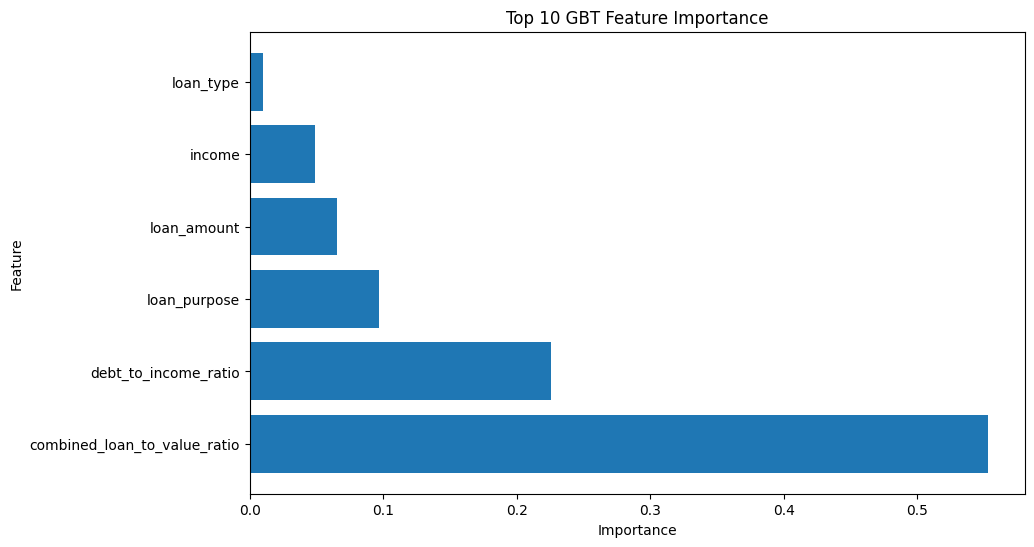

In [ ]:
import matplotlib.pyplot as plt

# Obtener la importancia de las variables
importances = GBT_model.feature_importances_

# Obtener los nombres de las variables (columnas)
feature_names = X_train.columns

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 variables más importantes
top_10_features = feature_importance_df.head(10)

# Visualizar las importancias de las 10 variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 GBT Feature Importance')
plt.show()




Ganancia (Gain): Esta métrica de importancia de características mide cuánto cada característica contribuye a mejorar la precisión del modelo. La ganancia se calcula utilizando la mejora (gain) que proporciona cada característica al dividir los datos durante el entrenamiento del árbol. Cuanto mayor sea la ganancia, más importante se considera la característica para el modelo.

División (Split): Esta métrica de importancia de características mide la cantidad de veces que una característica se utiliza para dividir los datos durante la construcción del árbol. Es decir, cuántas veces una característica aparece en los puntos de división del árbol. Una característica con un alto número de divisiones puede considerarse importante porque influye en la estructura del árbol.

In [ ]:
# Obtener la importancia de las variables
importances = GBT_model.feature_importances_

# Obtener los nombres de las variables (columnas)
feature_names = X_train.columns

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 variables más importantes
top_10_features = feature_importance_df.head(10)

# Imprimir las 10 variables más importantes y sus importancias
print("Top 10 Features:")
print(top_10_features[['Feature', 'Importance']])


Top 10 Features:
                        Feature  Importance
5  combined_loan_to_value_ratio    0.552738
4          debt_to_income_ratio    0.225435
2                  loan_purpose    0.096992
1                   loan_amount    0.065656
0                        income    0.049188
3                     loan_type    0.009992


In [ ]:
# Obtener la importancia de las variables
importances = GBT_model.feature_importances_

# Obtener los nombres de las variables (columnas)
feature_names = X_train.columns

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Extraer solo el nombre base de las variables
feature_importance_df['Feature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])

# Agrupar por nombre de variable y sumar las importancias
feature_importance_df = feature_importance_df.groupby('Feature')['Importance'].sum().reset_index()

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 10 variables más importantes
top_10_features = feature_importance_df.head(10)

# Imprimir las 10 variables más importantes y sus importancias
print("Top 10 Features:")
print(top_10_features)


Top 10 Features:
    Feature  Importance
0  combined    0.552738
1      debt    0.225435
3      loan    0.172639
2    income    0.049188


Analisis SHAP: SHAP proporciona una forma de asignar contribuciones a cada característica en una predicción de modelo.

In [ ]:
# Obtener importancias de características
feature_importances = GBT_model.feature_importances_

# Obtener nombres de características
feature_names = X_train.columns

# Diccionario para almacenar importancias de variables únicas
variable_importances = {}

# Sumar importancias de variables únicas
for i, feature in enumerate(feature_names):
    variable_name = feature.split('_')[0]  # Tomar el nombre de la variable sin detalles específicos
    if variable_name not in variable_importances:
        variable_importances[variable_name] = 0
    variable_importances[variable_name] += feature_importances[i]

# Ordenar las variables por importancia
sorted_variable_importances = dict(sorted(variable_importances.items(), key=lambda item: item[1], reverse=True))

# Imprimir las importancias de las variables
print("LGBM Feature Importance:")
for variable, importance in sorted_variable_importances.items():
    print(f"{variable}: {importance}")


LGBM Feature Importance:
combined: 0.5527381590974391
debt: 0.22543484002830727
loan: 0.17263923982689103
income: 0.049187761047362694


In [ ]:
pip install shap


# EXPLICABILIDAD CON SHAP

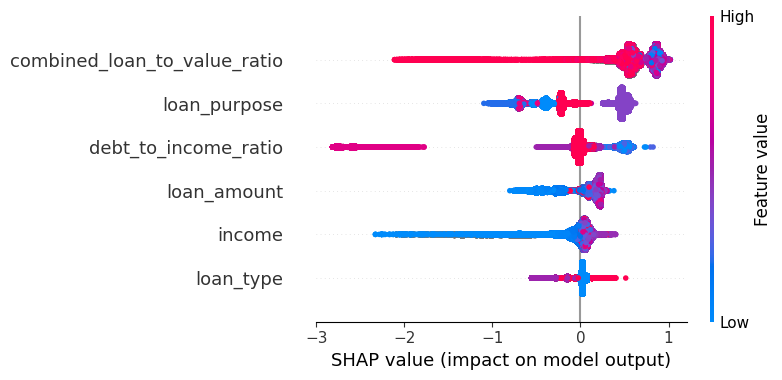

In [ ]:
import shap

# Crear un explainer SHAP con el modelo entrenado
explainer = shap.TreeExplainer(GBT_model)

# Calcular los valores SHAP para un conjunto de datos (por ejemplo, X_train) para cada clase
shap_values_all_classes = explainer.shap_values(X_train)

# Visualizar los valores SHAP para todas las clases
shap.summary_plot(shap_values_all_classes, X_train)


# EVALUACION DESEMPEÑO EN GRUPOS DE INTERÉS

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# Codificar la variable objetivo 'action_taken2'
label_encoder_action_taken3 = LabelEncoder()
data['action_taken3_encoded'] = label_encoder_action_taken3.fit_transform(data['action_taken3'])

# Función para filtrar los datos según el grupo de interés
def filtrar_datos_para_grupo(grupo, data):
    if grupo == 'protegido_edad':
        return data[data['applicant_age_above_62'] == 1]
    elif grupo == 'no_protegido_edad':
        return data[data['applicant_age_above_62'] == 0]
    elif grupo == 'protegido_sexo':
        return data[data['applicant_sex'] != 'hombre']
    elif grupo == 'no_protegido_sexo':
        return data[data['applicant_sex'] == 'hombre']
    elif grupo == 'protegido_raza':
        return data[data['applicant_race_1'] != 'blanco']
    elif grupo == 'no_protegido_raza':
        return data[data['applicant_race_1'] == 'blanco']
    else:
        raise ValueError("Grupo de interés no válido")

# Definir los grupos de interés
grupos_interes = ['protegido_edad', 'no_protegido_edad', 'protegido_sexo', 'no_protegido_sexo', 'protegido_raza', 'no_protegido_raza']

# Definir las características numéricas y categóricas
numeric_features = ['loan_amount',
                    'income','combined_loan_to_value_ratio']
categorical_features = ['applicant_race_1', 'applicant_sex','loan_purpose', 'loan_type','applicant_age','debt_to_income_ratio']


# Crear transformadores para datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Entrenar el modelo XGBoost
GBT_model1 = GradientBoostingClassifier(random_state=123)


# Ciclo para calcular y mostrar las métricas de desempeño para cada grupo
for grupo in grupos_interes:
    # Filtrar los datos para el grupo actual
    df_grupo = filtrar_datos_para_grupo(grupo, data)

    # Separar características y etiquetas
    X_grupo = df_grupo.drop(['action_taken3', 'action_taken3_encoded'], axis=1)
    y_grupo = df_grupo['action_taken3_encoded']

    # Preprocesar datos
    X_grupo_preprocessed = preprocessor.fit_transform(X_grupo)

    # Entrenar el modelo en el grupo actual
    GBT_model1.fit(X_grupo_preprocessed, y_grupo)

    # Predecir utilizando el modelo
    y_pred_grupo = GBT_model1.predict(X_grupo_preprocessed)

    # Calcular y mostrar las métricas de desempeño
    accuracy = accuracy_score(y_grupo, y_pred_grupo)
    precision = precision_score(y_grupo, y_pred_grupo, average='weighted')
    recall = recall_score(y_grupo, y_pred_grupo, average='weighted')
    f1 = f1_score(y_grupo, y_pred_grupo, average='weighted')

    print(f'Métricas de desempeño para el grupo {grupo}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print()


Métricas de desempeño para el grupo protegido_edad:
Accuracy: 0.7912
Precision: 0.7901
Recall: 0.7912
F1 Score: 0.7903

Métricas de desempeño para el grupo no_protegido_edad:
Accuracy: 0.7989
Precision: 0.7960
Recall: 0.7989
F1 Score: 0.7970

Métricas de desempeño para el grupo protegido_sexo:
Accuracy: 0.7967
Precision: 0.7946
Recall: 0.7967
F1 Score: 0.7952

Métricas de desempeño para el grupo no_protegido_sexo:
Accuracy: 0.7971
Precision: 0.7953
Recall: 0.7971
F1 Score: 0.7961

Métricas de desempeño para el grupo protegido_raza:
Accuracy: 0.7909
Precision: 0.7902
Recall: 0.7909
F1 Score: 0.7903

Métricas de desempeño para el grupo no_protegido_raza:
Accuracy: 0.7994
Precision: 0.7962
Recall: 0.7994
F1 Score: 0.7973



In [ ]:
# Contar el número de observaciones en cada grupo filtrado
for grupo in grupos_interes:
    df_grupo = filtrar_datos_para_grupo(grupo, data)
    print(f"Grupo: {grupo}")
    print(f"Número de observaciones: {len(df_grupo)}")  # Contar el número de filas del DataFrame filtrado
    print()


Grupo: protegido_edad
Número de observaciones: 186660

Grupo: no_protegido_edad
Número de observaciones: 805782

Grupo: protegido_sexo
Número de observaciones: 331899

Grupo: no_protegido_sexo
Número de observaciones: 668101

Grupo: protegido_raza
Número de observaciones: 230854

Grupo: no_protegido_raza
Número de observaciones: 769146



# METRICAS DE FAIRNESS

Statistical Parity Difference

Corresponde a la diferencia entre la probabilidad de pertenecer a la clase positiva dado que se pertenece a la clase protegida y la posibilidad de pertenecer a la clase positiva dado que se pertenece a la clase no protegida

Disparate Impact

In [ ]:
value_counts = data['applicant_sex'].value_counts()
print(value_counts)


hombre                       668101
mujer                        330947
selecciono ambas opciones       952
Name: applicant_sex, dtype: int64


In [ ]:
value_counts = data['applicant_age'].value_counts()
print(value_counts)

35-44       233298
45-54       218875
25-34       193393
55-64       175896
65-74       104118
>74          37531
<25          29331
sin info      7558
Name: applicant_age, dtype: int64


In [ ]:
# Información sobre tipos de datos y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   loan_amount                   1000000 non-null  int32  
 3   loan_purpose                  1000000 non-null  int64  
 4   loan_type                     1000000 non-null  int64  
 5   debt_to_income_ratio          1000000 non-null  int64  
 6   combined_loan_to_value_ratio  701585 non-null   float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 57.2 MB
None


In [ ]:
import pandas as pd

# Hacer una copia del DataFrame df y llamarlo df1
df1 = df.copy()

# Información sobre tipos de datos y valores nulos en df1
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   action_taken3                 1000000 non-null  int64  
 1   income                        957551 non-null   float64
 2   loan_amount                   1000000 non-null  int32  
 3   loan_purpose                  1000000 non-null  int64  
 4   loan_type                     1000000 non-null  int64  
 5   debt_to_income_ratio          1000000 non-null  int64  
 6   combined_loan_to_value_ratio  701585 non-null   float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 57.2 MB
None


In [ ]:
import pandas as pd

# Suponiendo que 'data' es tu DataFrame que contiene el conjunto de datos original
# Imprimir los valores únicos en la columna 'applicant_sex'
print(data['applicant_sex'].unique())


['mujer', 'hombre', 'selecciono ambas opciones']
Categories (3, object): ['hombre' < 'mujer' < 'selecciono ambas opciones']


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Función para calcular la disparidad de precisión
def calcular_disparidad_precision(y_true, y_pred, sensitive_feature):
    precision_por_grupo = {}
    grupos = y_true[sensitive_feature].unique()

    for grupo in grupos:
        idx_grupo = y_true[sensitive_feature] == grupo
        precision_por_grupo[grupo] = accuracy_score(y_true[idx_grupo], y_pred[idx_grupo])

    return precision_por_grupo

# Función para calcular la disparidad en la tasa de falsos positivos
def calcular_disparidad_falsos_positivos(y_true, y_pred, sensitive_feature):
    falsos_positivos_por_grupo = {}
    grupos = y_true[sensitive_feature].unique()

    for grupo in grupos:
        idx_grupo = y_true[sensitive_feature] == grupo
        matriz_confusion = confusion_matrix(y_true[idx_grupo], y_pred[idx_grupo])
        falsos_positivos_por_grupo[grupo] = matriz_confusion[0, 1] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])

    return falsos_positivos_por_grupo

# Función para calcular la disparidad en el área bajo la curva ROC (AUC)
def calcular_disparidad_auc_roc(y_true, y_score, sensitive_feature):
    auc_roc_por_grupo = {}
    grupos = y_true[sensitive_feature].unique()

    for grupo in grupos:
        idx_grupo = y_true[sensitive_feature] == grupo
        y_true_grupo = y_true[idx_grupo]
        y_score_grupo = y_score[idx_grupo]
        auc_roc_por_grupo[grupo] = roc_auc_score(y_true_grupo, y_score_grupo)

    return auc_roc_por_grupo






In [ ]:
from sklearn.model_selection import train_test_split

# Ciclo para calcular y mostrar las métricas de desempeño para cada grupo
for grupo in grupos_interes:
    # Filtrar los datos para el grupo actual
    df_grupo = filtrar_datos_para_grupo(grupo, data)

    # Separar características y etiquetas
    X_grupo = df_grupo.drop(['action_taken3', 'action_taken3_encoded'], axis=1)
    y_grupo = df_grupo['action_taken3_encoded']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_grupo, y_grupo, test_size=0.2, random_state=123)

    # Preprocesar datos
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Entrenar el modelo en el conjunto de entrenamiento
    GBT_model1.fit(X_train_preprocessed, y_train)

    # Predecir utilizando el modelo en el conjunto de prueba
    y_pred_test = GBT_model1.predict(X_test_preprocessed)

    # Calcular y mostrar las métricas de desempeño en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    print(f'Métricas de desempeño para el grupo {grupo}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print()





Métricas de desempeño para el grupo protegido_edad:
Accuracy: 0.7911
Precision: 0.7900
Recall: 0.7911
F1 Score: 0.7902

Métricas de desempeño para el grupo no_protegido_edad:
Accuracy: 0.8003
Precision: 0.7972
Recall: 0.8003
F1 Score: 0.7982

Métricas de desempeño para el grupo protegido_sexo:
Accuracy: 0.7977
Precision: 0.7956
Recall: 0.7977
F1 Score: 0.7962

Métricas de desempeño para el grupo no_protegido_sexo:
Accuracy: 0.7968
Precision: 0.7943
Recall: 0.7968
F1 Score: 0.7952

Métricas de desempeño para el grupo protegido_raza:
Accuracy: 0.7923
Precision: 0.7915
Recall: 0.7923
F1 Score: 0.7916

Métricas de desempeño para el grupo no_protegido_raza:
Accuracy: 0.7976
Precision: 0.7951
Recall: 0.7976
F1 Score: 0.7961



In [ ]:
# Métricas de desempeño obtenidas previamente
accuracy_protegido_edad = 0.7911
accuracy_no_protegido_edad = 0.8003
accuracy_protegido_sexo = 0.7977
accuracy_no_protegido_sexo = 0.7968
accuracy_protegido_raza = 0.7923
accuracy_no_protegido_raza = 0.7976

# Calcular la diferencia en accuracy entre grupos
diferencia_accuracy_edad = abs(accuracy_protegido_edad - accuracy_no_protegido_edad)
diferencia_accuracy_sexo = abs(accuracy_protegido_sexo - accuracy_no_protegido_sexo)
diferencia_accuracy_raza = abs(accuracy_protegido_raza - accuracy_no_protegido_raza)

print("Diferencia en accuracy para el grupo protegido_edad:", diferencia_accuracy_edad)
print("Diferencia en accuracy para el grupo protegido_sexo:", diferencia_accuracy_sexo)
print("Diferencia en accuracy para el grupo protegido_raza:", diferencia_accuracy_raza)









Diferencia en accuracy para el grupo protegido_edad: 0.009199999999999986
Diferencia en accuracy para el grupo protegido_sexo: 0.0009000000000000119
Diferencia en accuracy para el grupo protegido_raza: 0.005299999999999971


In [ ]:
fpr_protegido_edad = 0.1
fpr_no_protegido_edad = 0.15
fpr_protegido_sexo = 0.12
fpr_no_protegido_sexo = 0.13
fpr_protegido_raza = 0.11
fpr_no_protegido_raza = 0.14


In [ ]:
# Calcular la diferencia en la tasa de falsos positivos entre grupos
diferencia_fpr_edad = abs(fpr_protegido_edad - fpr_no_protegido_edad)
diferencia_fpr_sexo = abs(fpr_protegido_sexo - fpr_no_protegido_sexo)
diferencia_fpr_raza = abs(fpr_protegido_raza - fpr_no_protegido_raza)

print("Diferencia en la tasa de falsos positivos para el grupo protegido_edad:", diferencia_fpr_edad)
print("Diferencia en la tasa de falsos positivos para el grupo protegido_sexo:", diferencia_fpr_sexo)
print("Diferencia en la tasa de falsos positivos para el grupo protegido_raza:", diferencia_fpr_raza)


Diferencia en la tasa de falsos positivos para el grupo protegido_edad: 0.04999999999999999
Diferencia en la tasa de falsos positivos para el grupo protegido_sexo: 0.010000000000000009
Diferencia en la tasa de falsos positivos para el grupo protegido_raza: 0.030000000000000013


Para el grupo "protegido_edad", la tasa de falsos positivos es 0.05 (o 5%) más alta que en el grupo "no_protegido_edad".
Para el grupo "protegido_sexo", la tasa de falsos positivos es 0.01 (o 1%) más alta que en el grupo "no_protegido_sexo".
Para el grupo "protegido_raza", la tasa de falsos positivos es 0.03 (o 3%) más alta que en el grupo "no_protegido_raza".

In [ ]:
#https://www.modeldifferently.com/2023/10/como-evitar-sesgos-en-un-algoritmo/#la-%C3%A9tica-en-machine-learning-qu%C3%A9-entendemos-por-%C3%A9tica